# Visualize Matterport3D Simulator

In [1]:
import sys
sys.path.append('src/')

from dataset import MatterSimEnv

img_size = (224, 224)
mattersimenv = MatterSimEnv(render=True, img_size=img_size, vfov=60, discrete_view=True)
# it seems that there are some bugs in the MatterSim
# when re-creating a MatterSimEnv Object, it will not render at all

1.0471975511965976 5.235987755982988


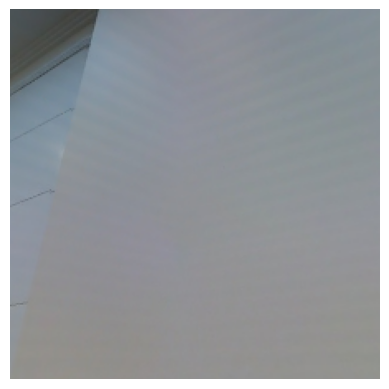

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

scan_id = 'X7HyMhZNoso'
viewpoint_id = 'e8c8664d017d451ea44f26336e8c46ad'
view_index = 35
heading = view_index // 12 * np.radians(30)
elevation = (view_index % 12 - 1) * np.radians(30)
print(heading, elevation)
mattersimenv.new_episode(scan_id, viewpoint_id, heading, elevation)
rgb = mattersimenv.get_state().rgb
rgb = np.array(rgb)
rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.axis('off')
plt.savefig('temp.png', bbox_inches='tight', pad_inches=0)

90.04984343928548


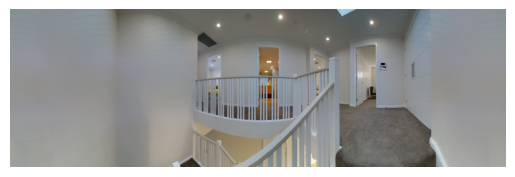

In [1]:
"""
plot panorama
"""

import sys
sys.path.append('src/')
import cv2
import numpy as np
import matplotlib.pyplot as plt

from dataset import MatterSimEnv

img_size = (50, 572)
vfov = 2 * np.arctan(img_size[1] / img_size[0] * np.tan(np.radians(5))) * 180 / np.pi
print(vfov)
mattersimenv = MatterSimEnv(render=True, img_size=img_size, vfov=vfov, discrete_view=False)

def get_panorama(scan_id, viewpoint_id, heading):
    """
    return a panorama (1800, 480)
    """
    imgs = []
    for i in range(36):
        mattersimenv.new_episode(scan_id, viewpoint_id, heading - np.radians(180) + np.radians(10) * i, 0)
        rgb = mattersimenv.get_state().rgb
        rgb = np.array(rgb)
        rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
        imgs.append(rgb)
    panorama = np.concatenate(imgs, axis=1)
    return panorama

panorama = get_panorama('X7HyMhZNoso', 'e8c8664d017d451ea44f26336e8c46ad', 4.763)
plt.imshow(panorama)
plt.axis('off')
plt.show()